    Main

Libraries

In [475]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('ggplot')

Set Seed for Reproducibility

In [476]:
# reproducibility
seed = 42
rng = np.random.default_rng(seed)

# PART 1

Set Users(N) and Resource Blocks(K)

In [477]:
N = 10
K = 50

Randomly create C matrix

CQI values range 0-15

In [478]:
# C = rng.integers(low=0, high=16, size=(N, K))
# Normal distribution mean 8 standard deviation 3
C = np.clip(np.round(rng.normal(loc=8, scale=3, size=(N, K))), 0, 15).astype(int)

# include diff fading and diff avg quality
# avg_quality = rng.uniform(-5, 25, size=N)[:, None]
# fading = rng.normal(0, 2, size=(N, K))
# C_dB = avg_quality + fading


Max C/I  Algorithm (greedy ανά RB)
Find for each Resource Block the User with best Quality ( max C value)

In [479]:
assignment = np.argmax(C, axis=0)

for k, user in enumerate(assignment):
    print(f"RB {k}: assigned to user {user}")

RB 0: assigned to user 6
RB 1: assigned to user 2
RB 2: assigned to user 9
RB 3: assigned to user 9
RB 4: assigned to user 7
RB 5: assigned to user 3
RB 6: assigned to user 9
RB 7: assigned to user 1
RB 8: assigned to user 2
RB 9: assigned to user 6
RB 10: assigned to user 6
RB 11: assigned to user 0
RB 12: assigned to user 3
RB 13: assigned to user 0
RB 14: assigned to user 3
RB 15: assigned to user 7
RB 16: assigned to user 3
RB 17: assigned to user 9
RB 18: assigned to user 2
RB 19: assigned to user 8
RB 20: assigned to user 6
RB 21: assigned to user 7
RB 22: assigned to user 0
RB 23: assigned to user 5
RB 24: assigned to user 5
RB 25: assigned to user 7
RB 26: assigned to user 4
RB 27: assigned to user 4
RB 28: assigned to user 7
RB 29: assigned to user 9
RB 30: assigned to user 0
RB 31: assigned to user 7
RB 32: assigned to user 5
RB 33: assigned to user 4
RB 34: assigned to user 8
RB 35: assigned to user 3
RB 36: assigned to user 2
RB 37: assigned to user 2
RB 38: assigned to use

Calculate Rate for each resource block using the channel quality value of the assigned user.

Rate proportional to C, rate = a * C. Using a = 1.

Rate per rb in Mbps
Data Rate achievable on RB :
R = Bandwidth of RB * Spectral efficiency
Rate per RB =HX * Spectral efficiency
3GPP Array CQI -> Spectral Efficiency

Rates->achievable rates for each user in each rb

Rates_per_rb -> rates achieved on RB by assigned user

In [480]:
CQI_to_eff = np.array([
    0.00, 0.1523, 0.2344, 0.3770, 0.6016, 0.8770,
    1.1758, 1.4766, 1.9141, 2.4063, 2.7305,
    3.3223, 3.9023, 4.5234, 5.1152, 5.5547
])

B_RB = 180e3  # Hz

rates = B_RB * CQI_to_eff[C] / 1e6  # Mbps

# rates_per_rb = C[assignment, np.arange(K)]
rates_per_rb = rates[assignment, np.arange(K)]

for k in range(K):
    print(f"RB {k}: rate = {rates_per_rb[k]:.2f} Mbps")

RB 0: rate = 0.81 Mbps
RB 1: rate = 0.70 Mbps
RB 2: rate = 0.92 Mbps
RB 3: rate = 0.92 Mbps
RB 4: rate = 0.60 Mbps
RB 5: rate = 0.81 Mbps
RB 6: rate = 0.60 Mbps
RB 7: rate = 0.70 Mbps
RB 8: rate = 0.60 Mbps
RB 9: rate = 0.81 Mbps
RB 10: rate = 0.70 Mbps
RB 11: rate = 0.49 Mbps
RB 12: rate = 0.92 Mbps
RB 13: rate = 0.60 Mbps
RB 14: rate = 0.60 Mbps
RB 15: rate = 0.70 Mbps
RB 16: rate = 0.60 Mbps
RB 17: rate = 0.92 Mbps
RB 18: rate = 0.81 Mbps
RB 19: rate = 0.70 Mbps
RB 20: rate = 0.49 Mbps
RB 21: rate = 0.70 Mbps
RB 22: rate = 0.70 Mbps
RB 23: rate = 0.92 Mbps
RB 24: rate = 0.81 Mbps
RB 25: rate = 1.00 Mbps
RB 26: rate = 1.00 Mbps
RB 27: rate = 0.92 Mbps
RB 28: rate = 0.81 Mbps
RB 29: rate = 1.00 Mbps
RB 30: rate = 0.92 Mbps
RB 31: rate = 0.70 Mbps
RB 32: rate = 0.60 Mbps
RB 33: rate = 0.70 Mbps
RB 34: rate = 0.60 Mbps
RB 35: rate = 0.81 Mbps
RB 36: rate = 0.43 Mbps
RB 37: rate = 0.60 Mbps
RB 38: rate = 0.92 Mbps
RB 39: rate = 1.00 Mbps
RB 40: rate = 0.81 Mbps
RB 41: rate = 0.49 Mbps
RB

Total Rate

In [481]:
total_rate = np.sum(rates_per_rb)

Total Rate per User

In [482]:
total_rate_per_user = np.zeros(N)

for k, user in enumerate(assignment):
    total_rate_per_user[user] += rates_per_rb[k]

for user in range(N):
    print(f"User {user}: total rate = {total_rate_per_user[user]:.2f}")

User 0: total rate = 3.80
User 1: total rate = 0.70
User 2: total rate = 5.07
User 3: total rate = 5.26
User 4: total rate = 5.46
User 5: total rate = 3.04
User 6: total rate = 3.52
User 7: total rate = 4.52
User 8: total rate = 1.30
User 9: total rate = 4.96


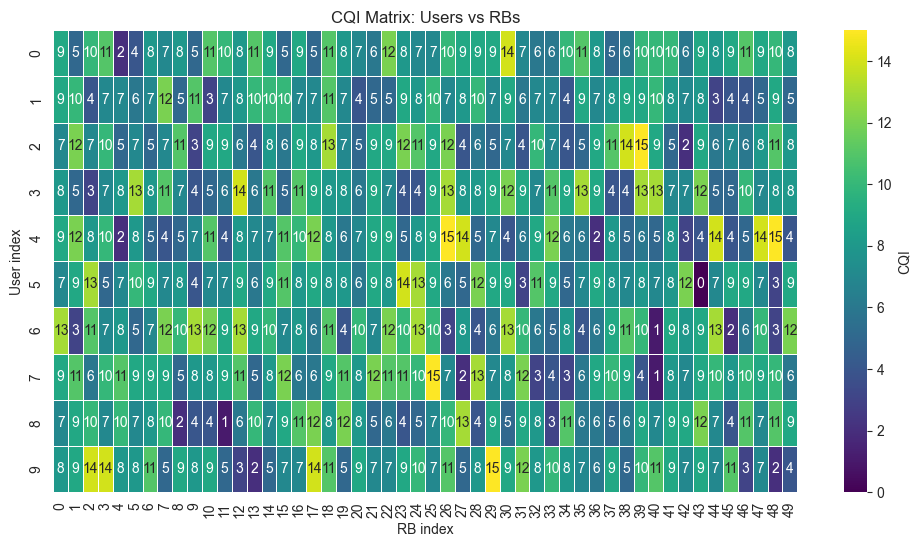

In [483]:
import seaborn as sns

# C is N x K (users x RBs)
plt.figure(figsize=(12, 6))

sns.heatmap(
    C,
    cmap="viridis",       # color indicates CQI value
    annot=True,           # show actual CQI numbers (optional)
    fmt=".0f",
    cbar_kws={'label': 'CQI'},
    linewidths=0.5
)

plt.xlabel("RB index")
plt.ylabel("User index")
plt.title("CQI Matrix: Users vs RBs")
plt.show()


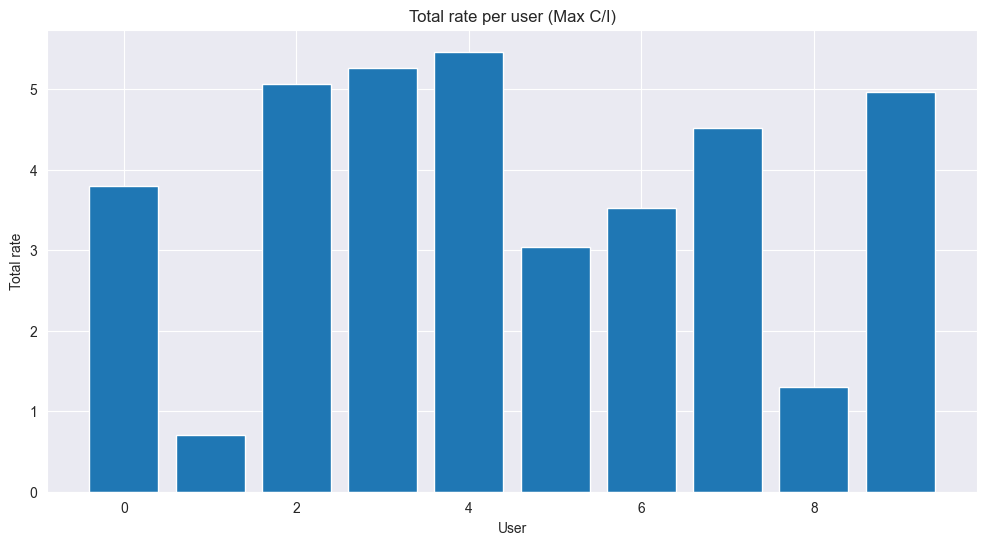

In [484]:
plt.figure(figsize=(12, 6))
plt.bar(range(N), total_rate_per_user)
plt.xlabel("User")
plt.ylabel("Total rate")
plt.title("Total rate per user (Max C/I)")
plt.show()

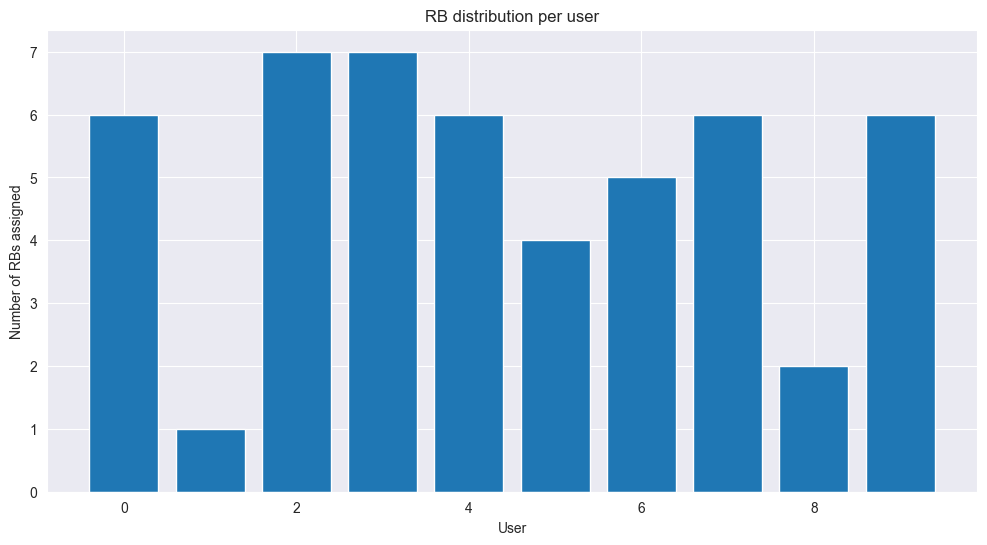

In [485]:
rb_count_per_user = np.zeros(N, dtype=int)
for u in assignment:
    rb_count_per_user[u] += 1

plt.figure(figsize=(12, 6))
plt.bar(range(N), rb_count_per_user)
plt.xlabel("User")
plt.ylabel("Number of RBs assigned")
plt.title("RB distribution per user")
plt.show()

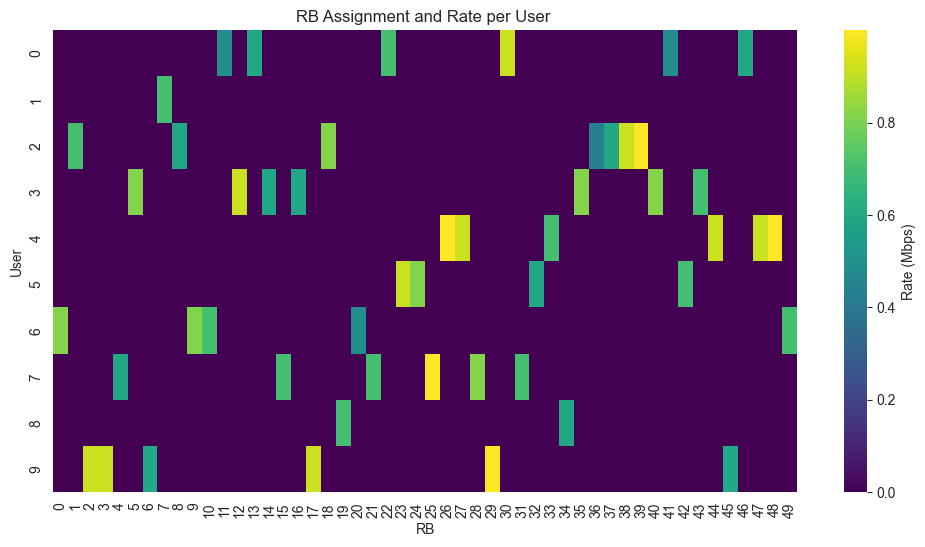

In [486]:
# visual[i,k] = rate if RB k is assigned to user i, else 0
visual = np.zeros((N, K))
for k, user in enumerate(assignment):
    visual[user, k] = rates_per_rb[k]

plt.figure(figsize=(12, 6))
sns.heatmap(visual, cmap="viridis", annot=False, cbar_kws={'label': 'Rate (Mbps)'})
plt.xlabel("RB")
plt.ylabel("User")
plt.title("RB Assignment and Rate per User ")
plt.show()

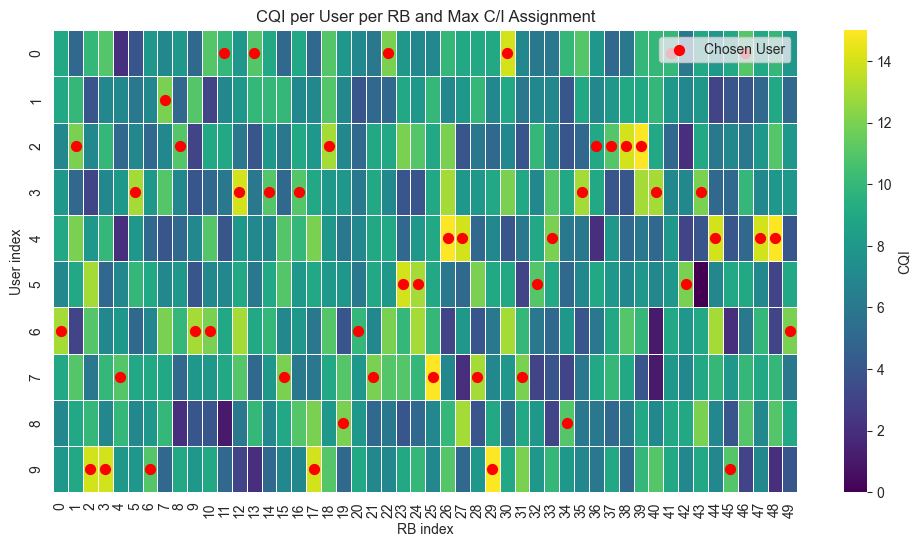

In [487]:
# C: CQI matrix (N users x K RBs)
# assignment: user index assigned to each RB

plt.figure(figsize=(12, 6))

# Heatmap: rows=users, columns=RBs, color=CQI
sns.heatmap(C, cmap="viridis", annot=False, cbar_kws={'label': 'CQI'}, linewidths=0.5)

# Overlay chosen user for each RB
chosen_users = assignment
RB_indices = np.arange(C.shape[1])
plt.scatter(RB_indices + 0.5, chosen_users + 0.5, color='red', s=50, label='Chosen User', marker='o')

plt.xlabel("RB index")
plt.ylabel("User index")
plt.title("CQI per User per RB and Max C/I Assignment")
plt.legend(loc='upper right')
plt.show()




# PART 2

Initialisation of T, queues and avg_rate_per_user

In [488]:
T = 1000
queues = np.zeros(N)
avg_rate_per_user = np.zeros(N)
queues_history = np.zeros((T, N))
throughput_history = np.zeros((T, N))
avg_throughput_history = np.zeros((T, N))
jfi_history = np.zeros(T)

Random C matrix every TTI (timestep)
Random requested data rate Q matrix every TTI (timestep)

In [489]:
for t in range(T):
    # C = rng.integers(low=0, high=16, size=(N, K))
    C = np.clip(np.round(rng.normal(loc=8, scale=3, size=(N, K))), 0, 15).astype(int)

    # Requested rate Q[t, i] ~ Normal(mean_i, std)
    Q_mean = rng.uniform(0.5, 1.5, size=N)  #per user
    Q = rng.normal(loc=Q_mean, scale=0.1, size=N)
    Q = np.maximum(Q, 0)  # αρνητικά rates δεν έχουν νόημα

    # Max C/I
    # assignment = np.argmax(C, axis=0)
    # Added tiny random noise so argmax breaks ties randomly
    assignment = np.argmax(C + rng.random(C.shape) * 1e-6, axis=0)


    # Compute Rates
    rates = B_RB * CQI_to_eff[C] / 1e6
    rates_per_rb = rates[assignment, np.arange(K)]

    # Update Queue
    # queue = previous queue + request - served
    queues += Q
    for k, user in enumerate(assignment):
        queues[user] = max(queues[user] - rates_per_rb[k], 0)

    # Throughput update for every TTI
    instant_throughput = np.zeros(N)

    for k, user in enumerate(assignment):
        instant_throughput[user] += rates_per_rb[k]

    # Mean throughput
    avg_rate_per_user = (avg_rate_per_user*t + instant_throughput) / (t+1)

    #  Jain's fairness index
    # 1->Perfectly fair. All users same amount of resources
    # 0-> Completely unfair. All resources allocated to a single user.
    JFI = (np.sum(instant_throughput)**2) / (N * np.sum(instant_throughput**2))

    # Save history for plotting
    queues_history[t, :] = queues
    throughput_history[t, :] = instant_throughput
    avg_throughput_history[t, :] = avg_rate_per_user
    jfi_history[t] = JFI

    Plots

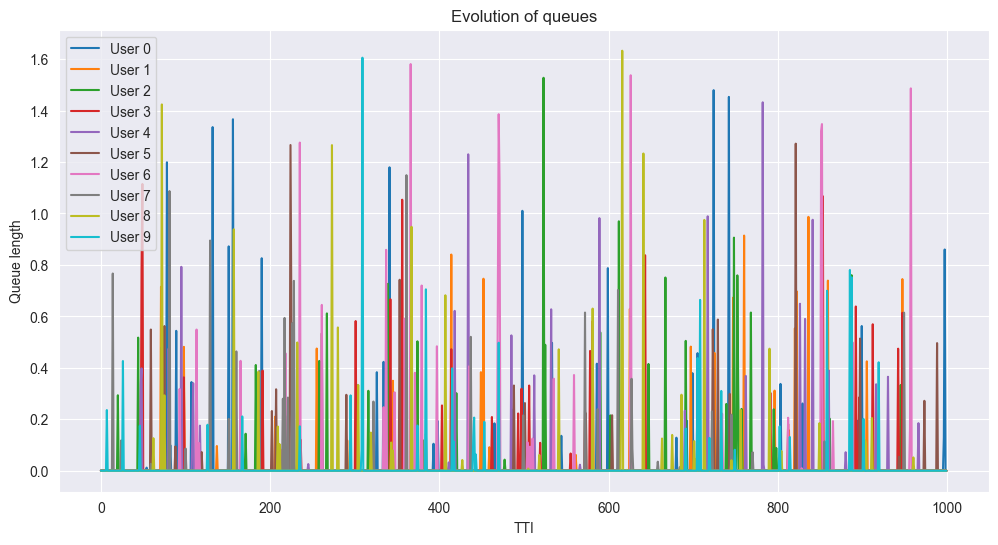

In [490]:
plt.figure(figsize=(12, 6))
for i in range(N):
    plt.plot(range(T), queues_history[:,i], label=f'User {i}')
plt.xlabel("TTI")
plt.ylabel("Queue length")
plt.title("Evolution of queues")
plt.legend()
plt.show()

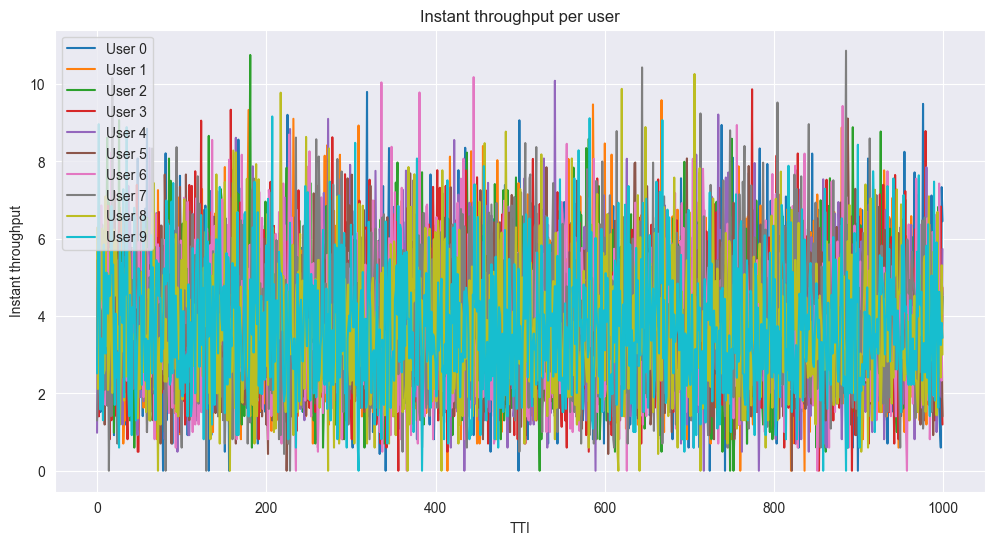

In [491]:
plt.figure(figsize=(12, 6))
for i in range(N):
    plt.plot(range(T), throughput_history[:,i], label=f'User {i}')
plt.xlabel("TTI")
plt.ylabel("Instant throughput")
plt.title("Instant throughput per user")
plt.legend()
plt.show()

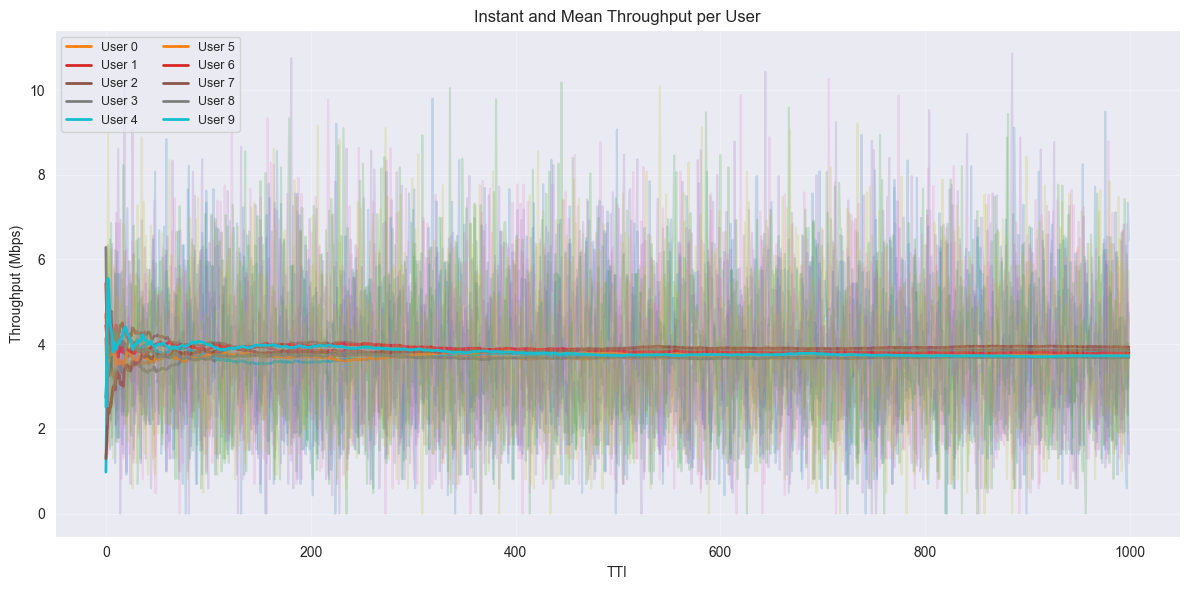

In [492]:
plt.figure(figsize=(12, 6))
for i in range(N):
    # instantaneous throughput as faint lines
    plt.plot(range(T), throughput_history[:, i], alpha=0.2)
    # mean throughput as solid bold lines
    plt.plot(range(T), avg_throughput_history[:, i], linewidth=2, label=f'User {i}')

plt.xlabel("TTI")
plt.ylabel("Throughput (Mbps)")
plt.title("Instant and Mean Throughput per User")
plt.legend(loc='upper left', ncol=2, fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


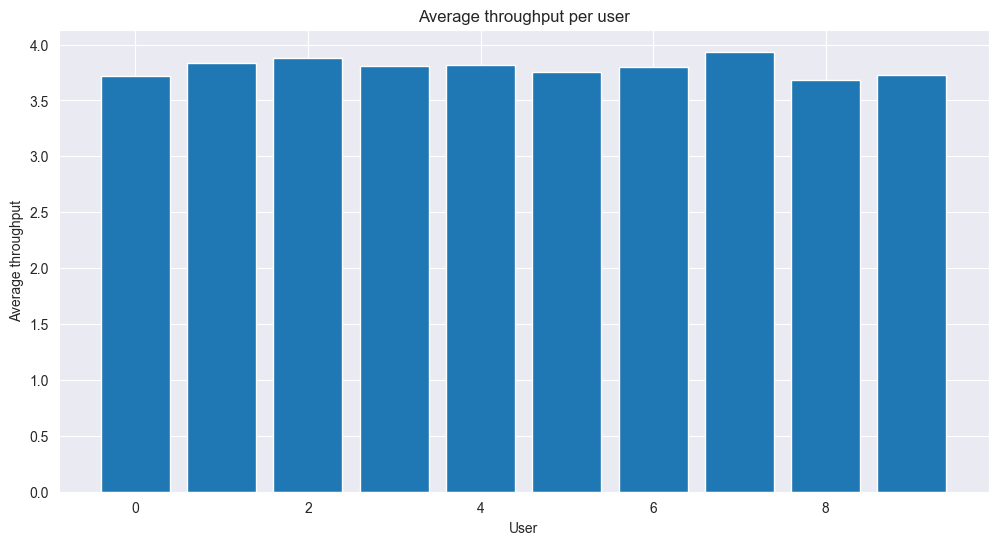

In [493]:
plt.figure(figsize=(12, 6))
plt.bar(range(N), avg_rate_per_user)
plt.xlabel("User")
plt.ylabel("Average throughput")
plt.title("Average throughput per user")
plt.show()

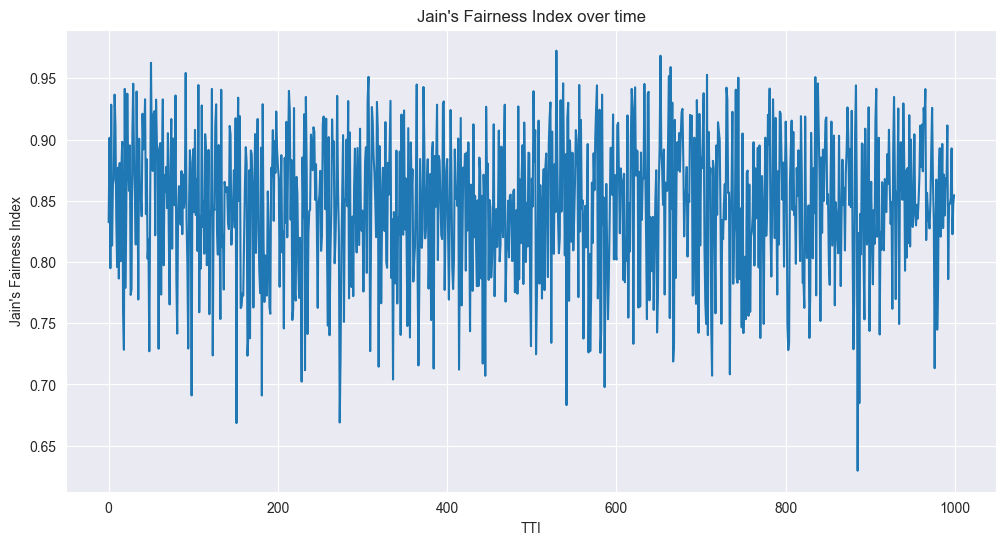

In [494]:
plt.figure(figsize=(12, 6))
plt.plot(range(T), jfi_history)
plt.xlabel("TTI")
plt.ylabel("Jain's Fairness Index")
plt.title("Jain's Fairness Index over time")
plt.show()

# PART3

Proportional Fair (PF) -> Forgetting factor a values

In [495]:
a_values = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9]

History Storing Dictionaries

In [496]:
queues_history_a = {}
throughput_history_a = {}
avg_throughput_history_a = {}
jfi_history_a = {}

In [497]:
for a in a_values:
    # Initialize per-user queues and throughput
    queues = np.zeros(N)
    avg_rate_pf = np.ones(N) * 1e-6

    # Prepare history arrays
    queues_history = np.zeros((T, N))
    throughput_history = np.zeros((T, N))
    avg_throughput_history = np.zeros((T, N))
    jfi_history = np.zeros(T)

    for t in range(T):

        C = np.clip(np.round(rng.normal(loc=8, scale=3, size=(N, K))), 0, 15).astype(int)
        Q_mean = rng.uniform(0.5, 1.5, size=N)
        Q = rng.normal(loc=Q_mean, scale=0.1, size=N)
        Q = np.maximum(Q, 0)

        # Compute achievable data rates according to instantaneous channel quality
        rates = B_RB * CQI_to_eff[C] / 1e6

        # PF metric
        metric = rates / avg_rate_pf[:, np.newaxis]
        assignment = np.argmax(metric, axis=0)

        # Compute rates per rb
        rates_per_rb = rates[assignment, np.arange(K)]

        # Update queues
        queues += Q
        for k, user in enumerate(assignment):
            queues[user] = max(queues[user] - rates_per_rb[k], 0)

        # Instantaneous throughput
        instant_throughput = np.zeros(N)
        for k, user in enumerate(assignment):
            instant_throughput[user] += rates_per_rb[k]

        # Update average throughput with forgetting factor a
        avg_rate_pf = (1 - a) * avg_rate_pf + a * instant_throughput

        # Jain's Fairness
        JFI = (np.sum(instant_throughput)**2) / (N * np.sum(instant_throughput**2))

        # Store history
        queues_history[t, :] = queues
        throughput_history[t, :] = instant_throughput
        avg_throughput_history[t, :] = avg_rate_pf
        jfi_history[t] = JFI

    # Save results for this a
    queues_history_a[a] = queues_history
    throughput_history_a[a] = throughput_history
    avg_throughput_history_a[a] = avg_throughput_history
    jfi_history_a[a] = jfi_history


    Plots

Queue evolution

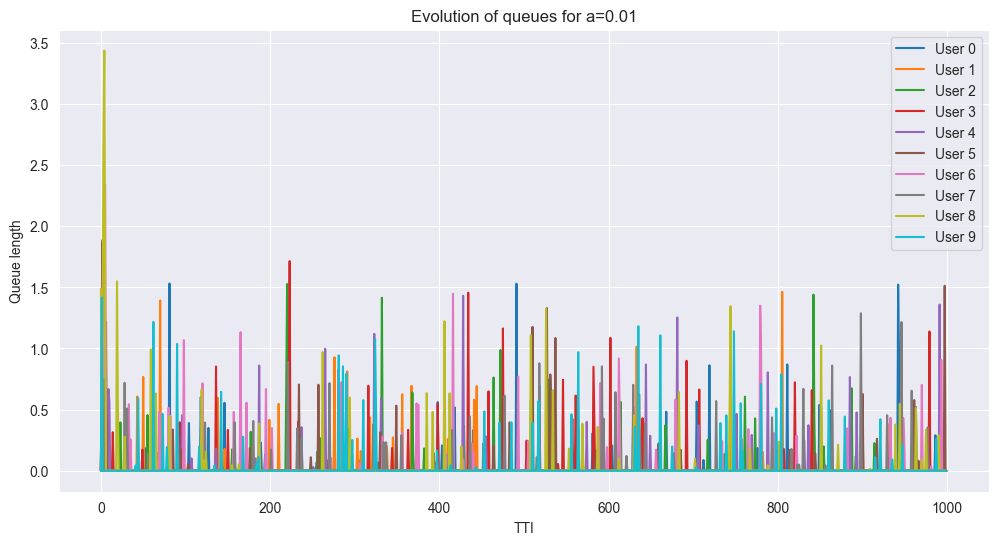

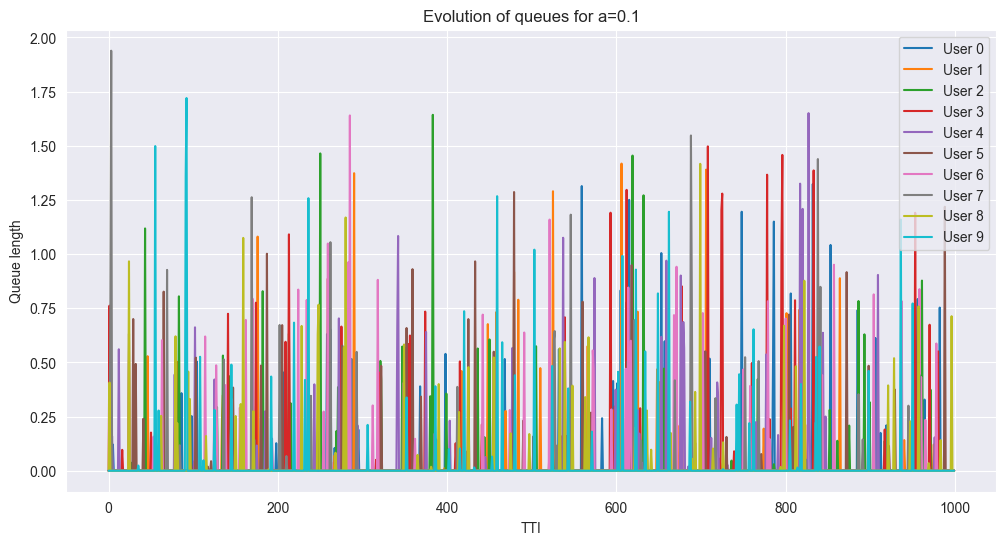

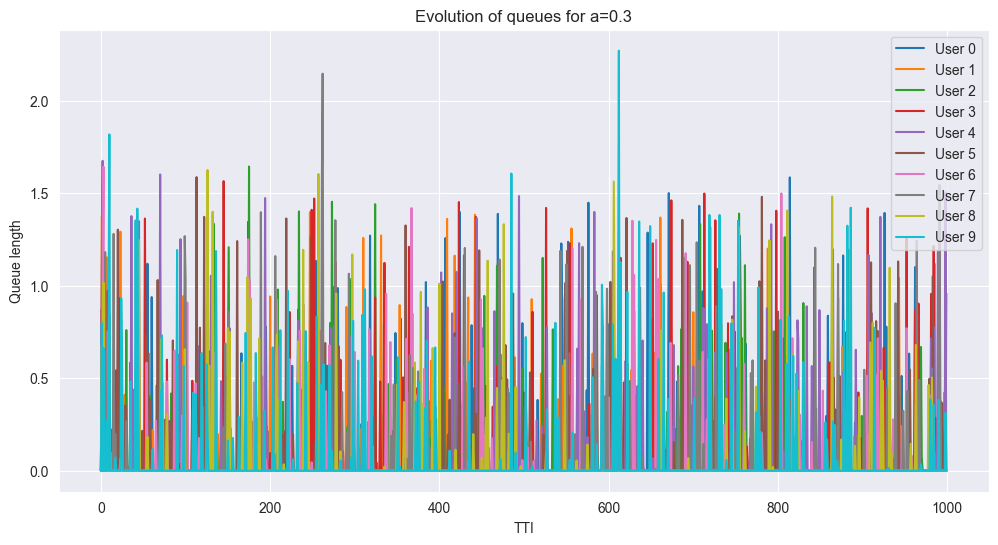

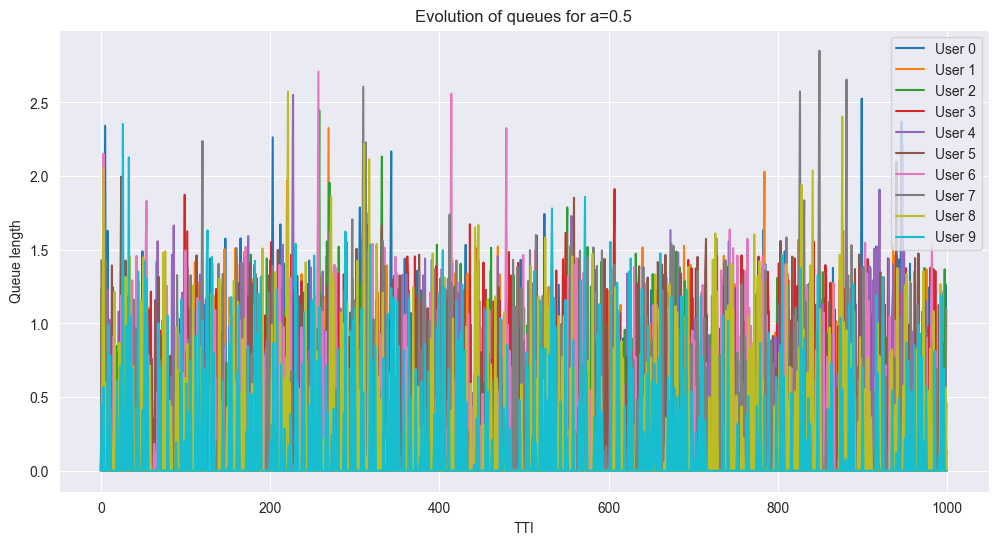

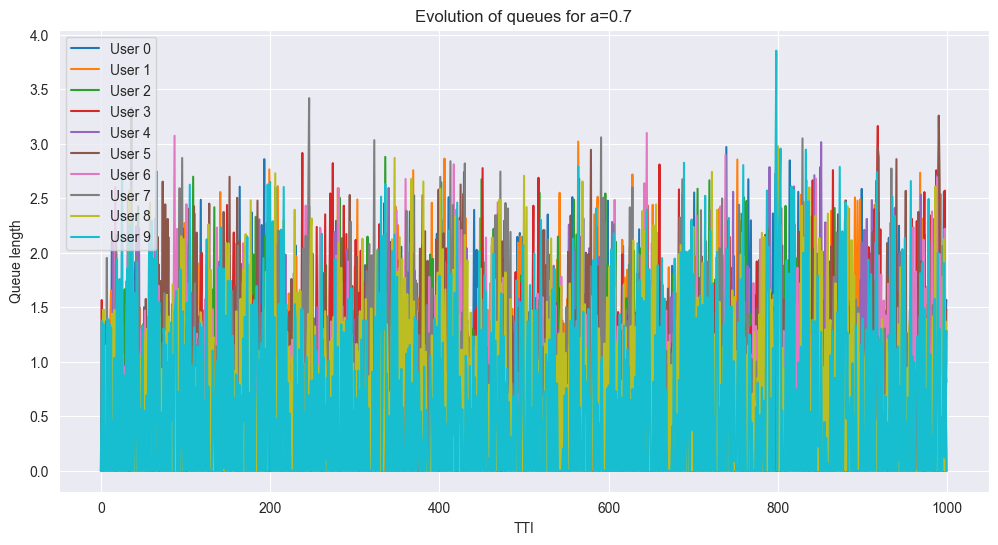

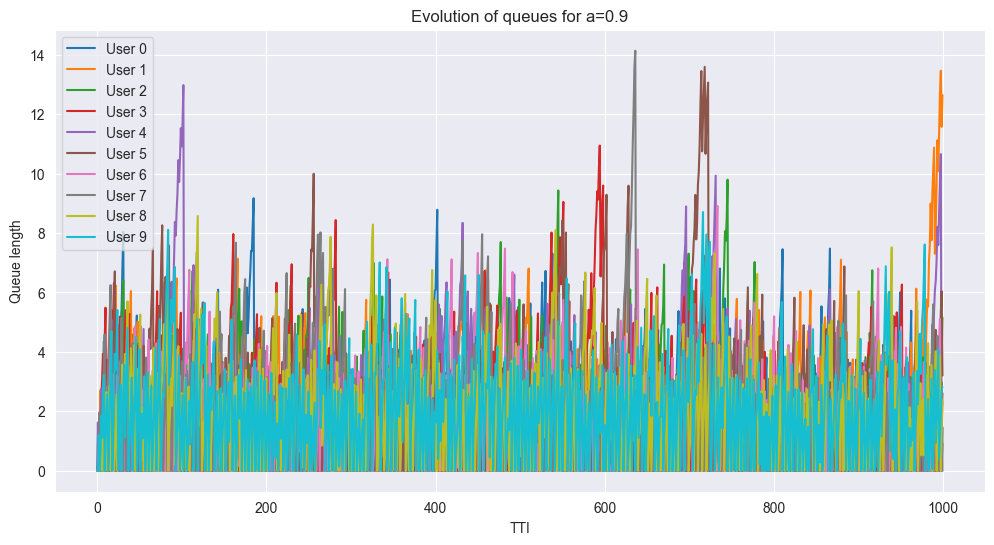

In [498]:
for a in a_values:
    queues_history = queues_history_a[a]

    plt.figure(figsize=(12, 6))
    for i in range(N):
        plt.plot(range(T), queues_history[:, i], label=f'User {i}')
    plt.xlabel("TTI")
    plt.ylabel("Queue length")
    plt.title(f"Evolution of queues for a={a}")
    plt.legend()
    plt.show()


Instant throughput

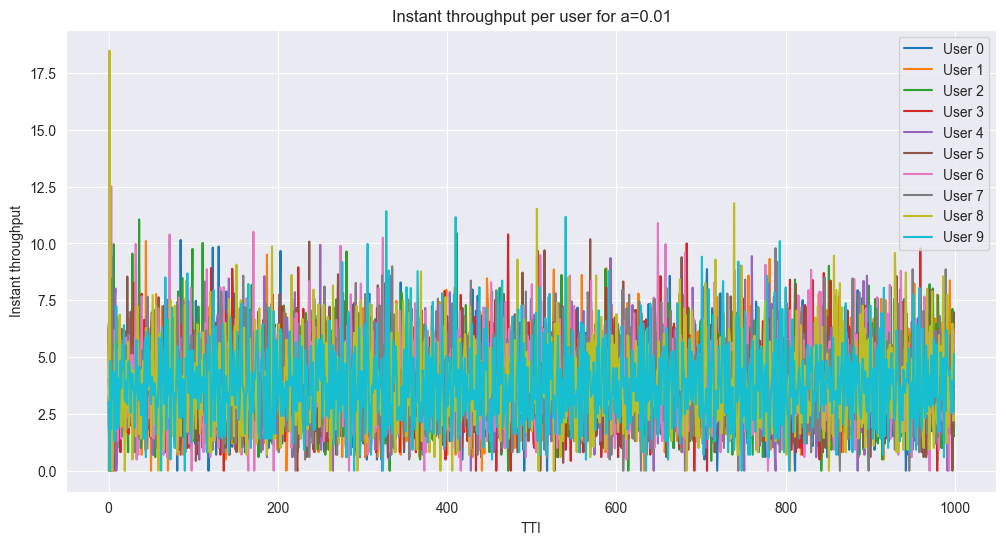

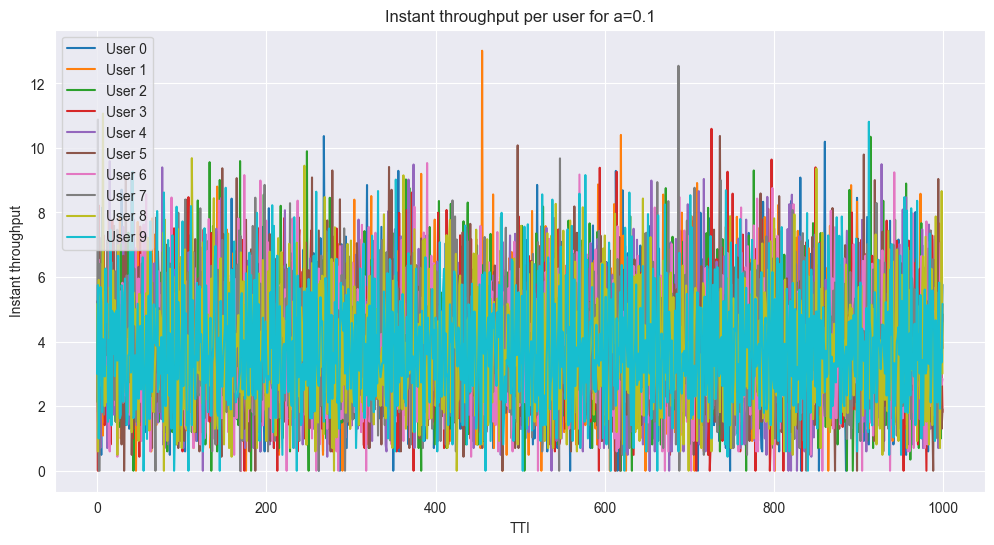

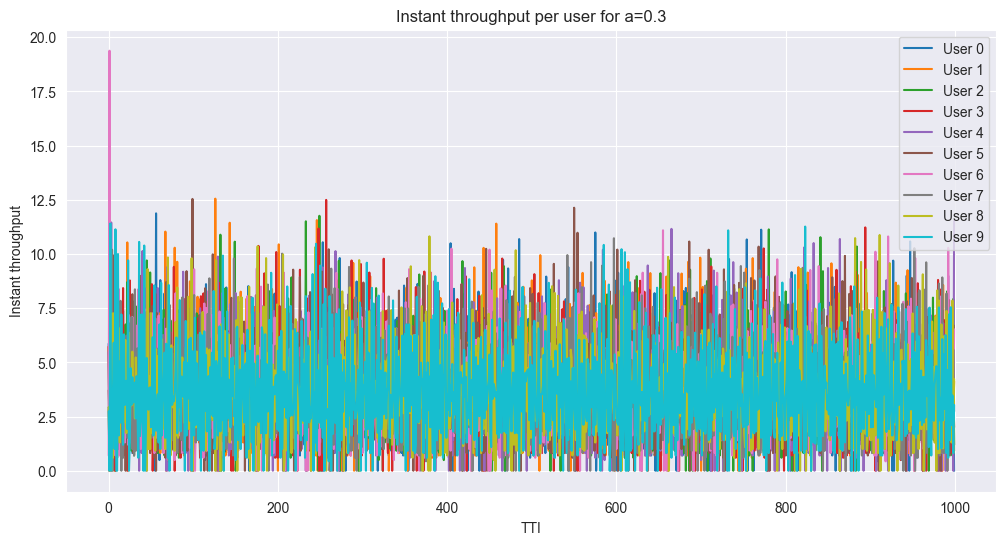

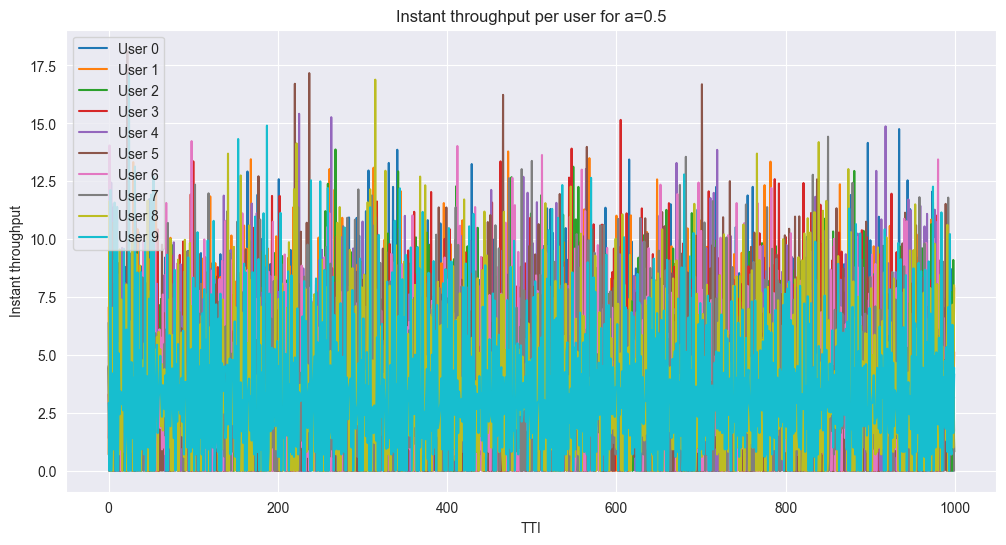

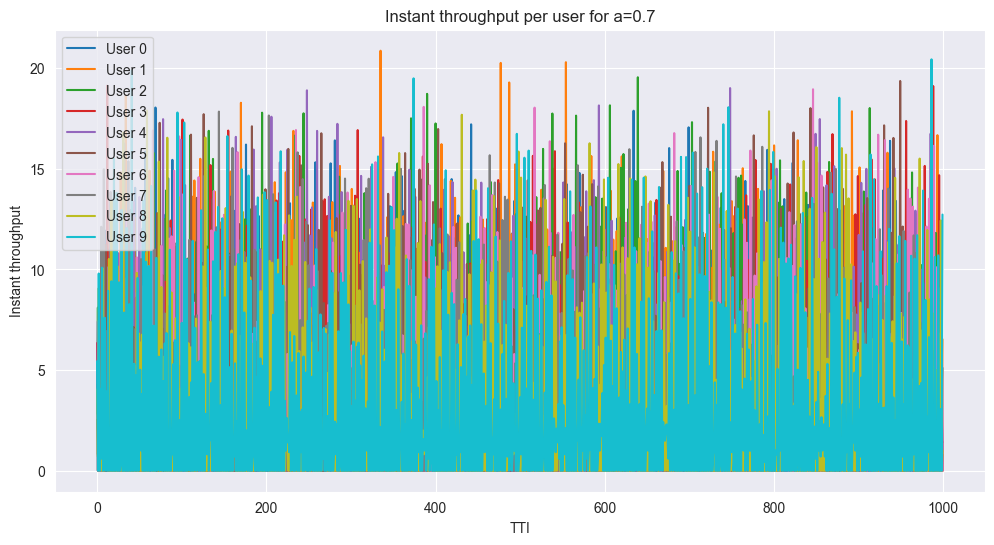

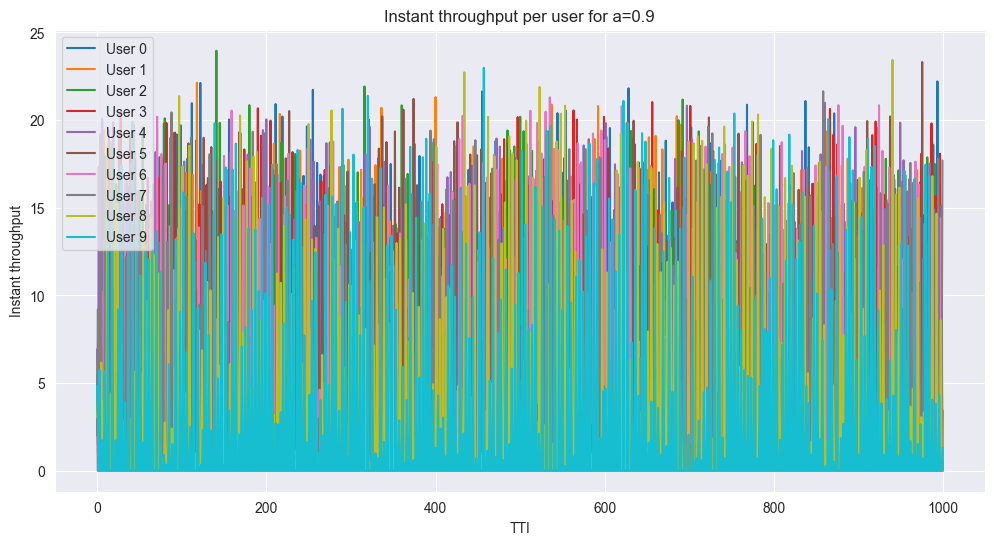

In [499]:
for a in a_values:
    throughput_history = throughput_history_a[a]

    plt.figure(figsize=(12, 6))
    for i in range(N):
        plt.plot(range(T), throughput_history[:, i], label=f'User {i}')
    plt.xlabel("TTI")
    plt.ylabel("Instant throughput")
    plt.title(f"Instant throughput per user for a={a}")
    plt.legend()
    plt.show()

Average throughput

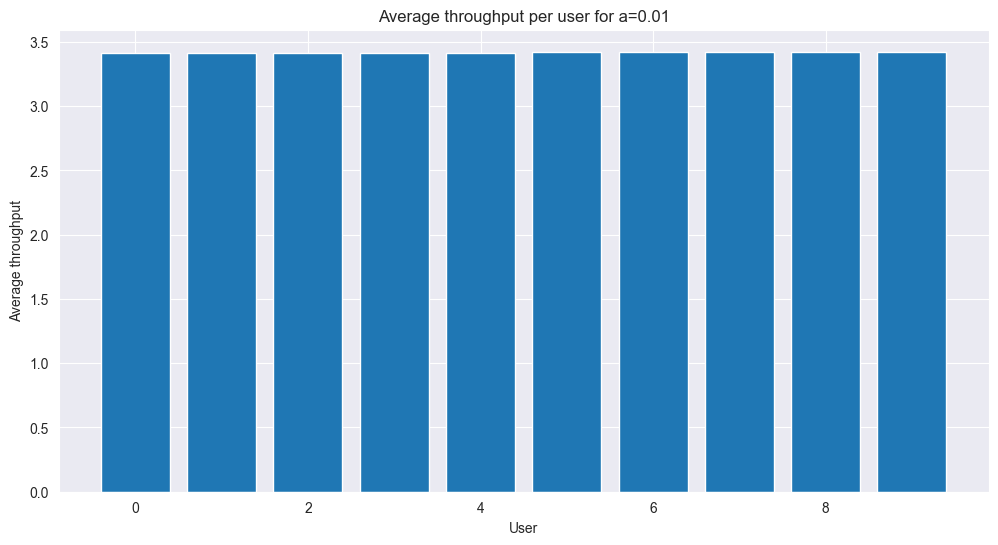

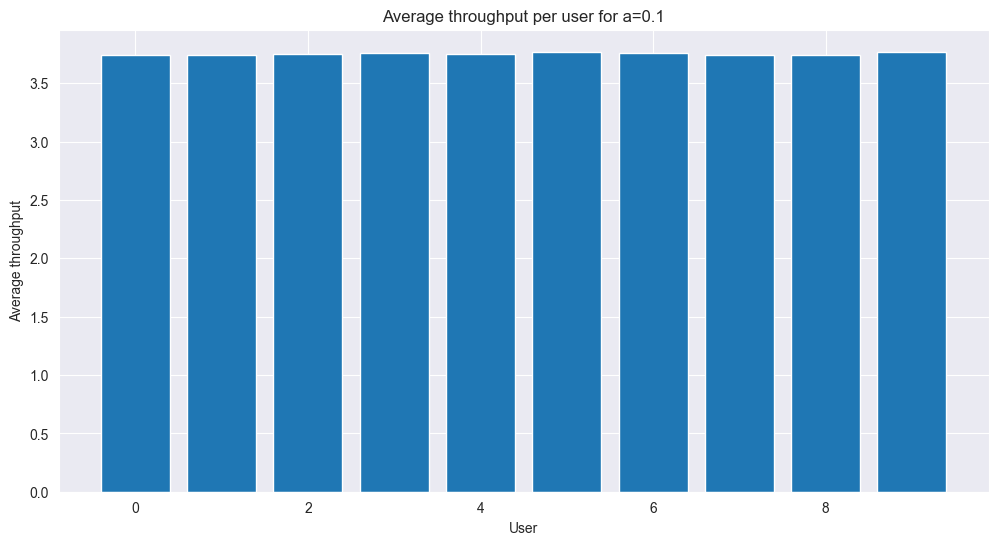

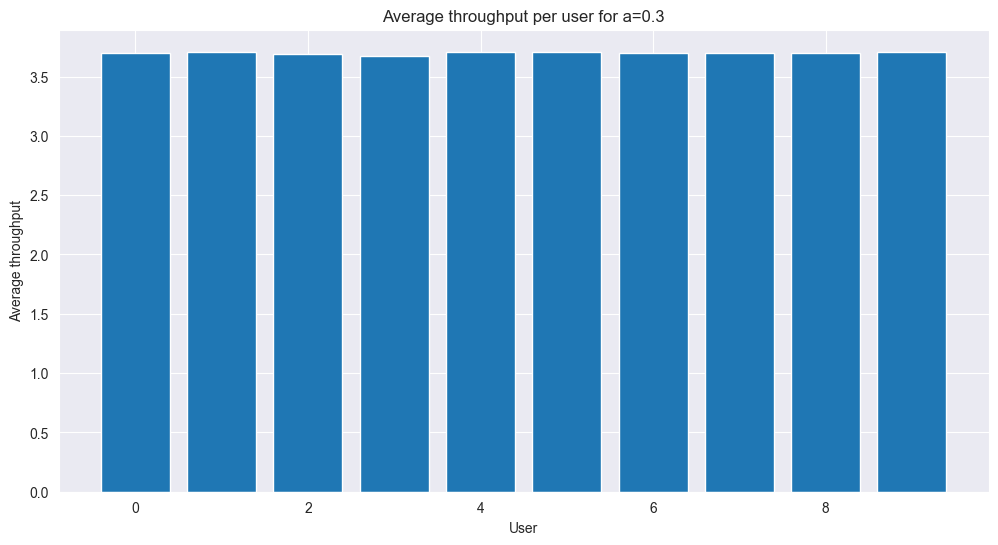

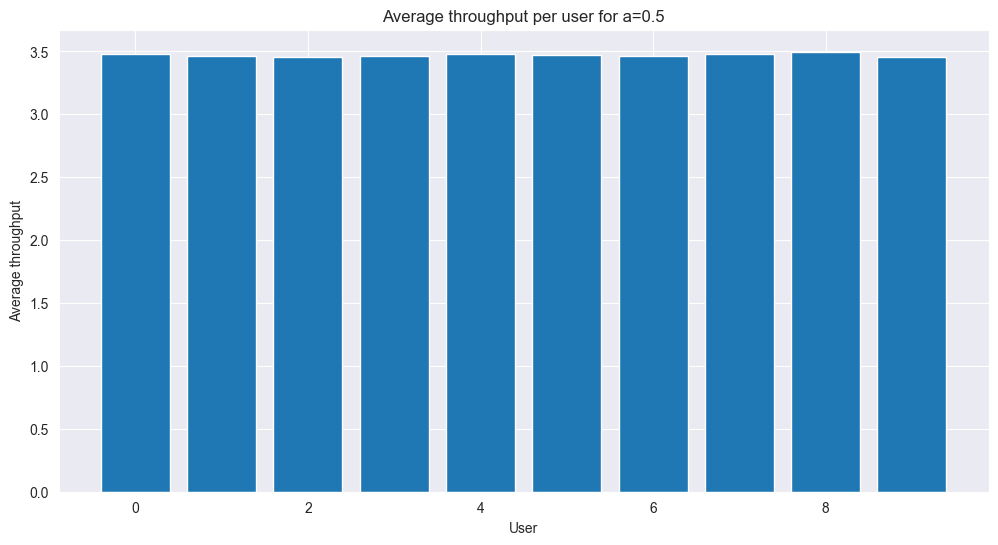

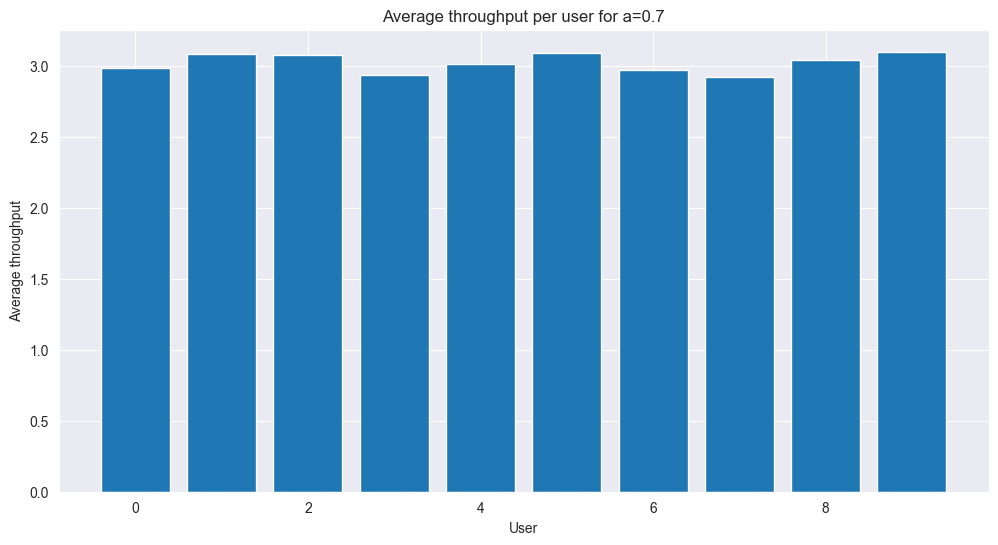

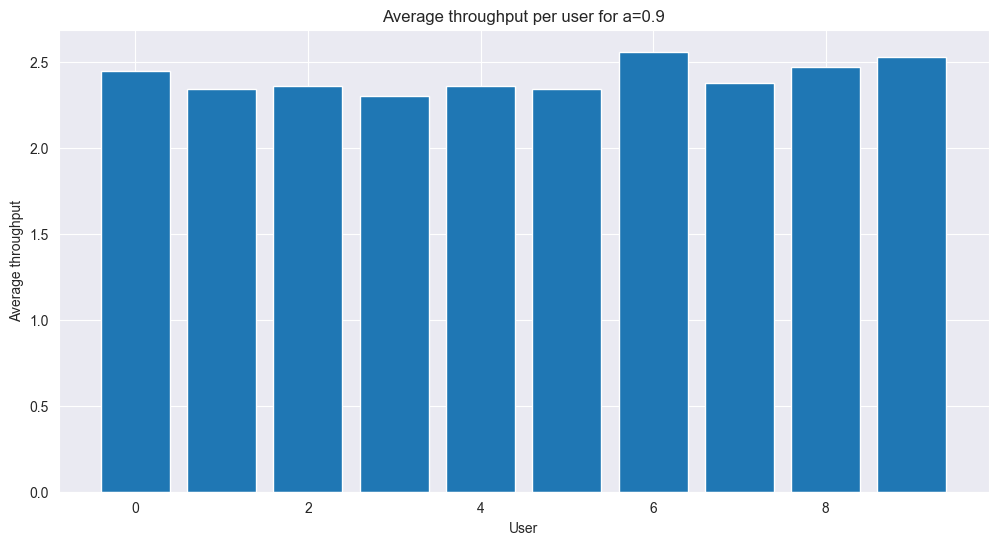

In [500]:
for a in a_values:
    avg_rate_per_user = avg_throughput_history_a[a].mean(axis=0)  # μέσος throughput ανά χρήστη

    plt.figure(figsize=(12, 6))
    plt.bar(range(N), avg_rate_per_user)
    plt.xlabel("User")
    plt.ylabel("Average throughput")
    plt.title(f"Average throughput per user for a={a}")
    plt.show()


Sum up of mean throughput for all a values

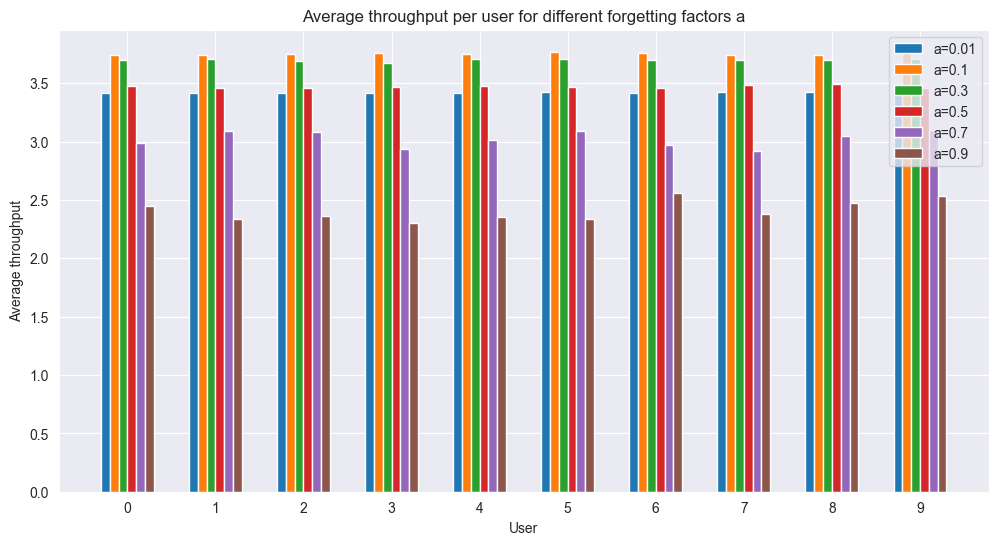

In [501]:
users = np.arange(N)             # center positions for each user
width = 0.1                     # width of each individual bar
n_a = len(a_values)              # number of bars per group

plt.figure(figsize=(12, 6))

# Offset bars around each user position
for i, a in enumerate(a_values):
    avg_rate_per_user = avg_throughput_history_a[a].mean(axis=0)
    plt.bar(users + (i - (n_a-1)/2)*width, avg_rate_per_user, width=width, label=f'a={a}')

plt.xlabel("User")
plt.ylabel("Average throughput")
plt.title("Average throughput per user for different forgetting factors a")
plt.xticks(users)   # keep user numbers as ticks
plt.legend()
plt.show()


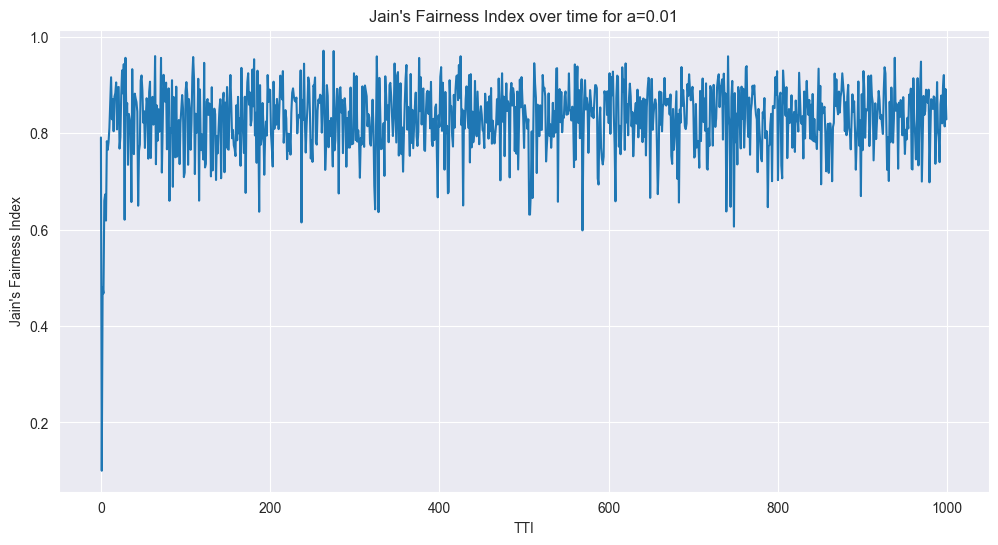

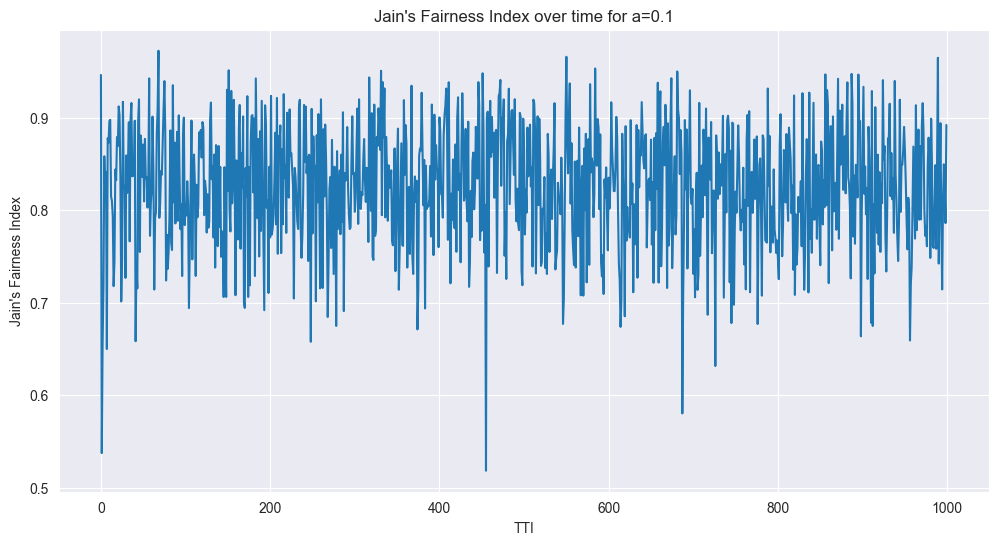

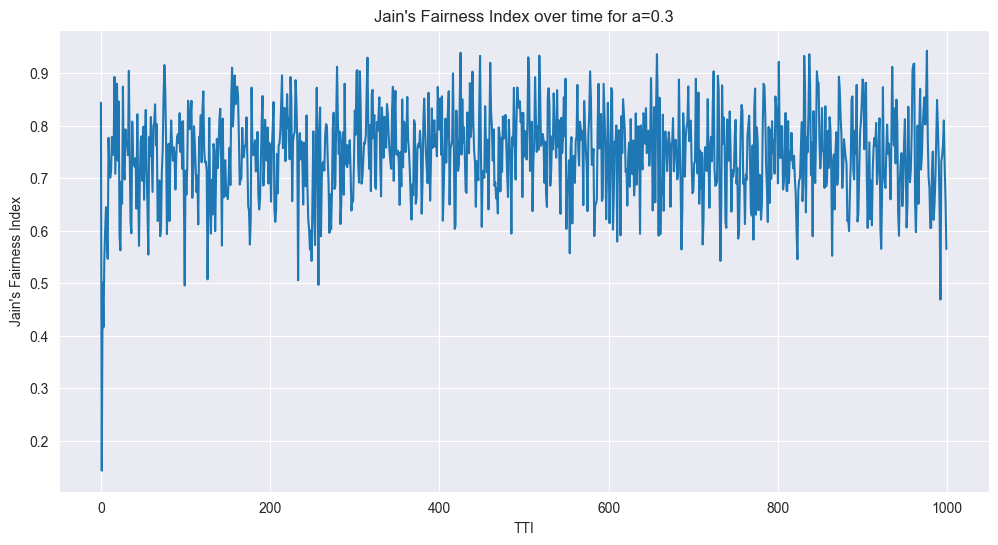

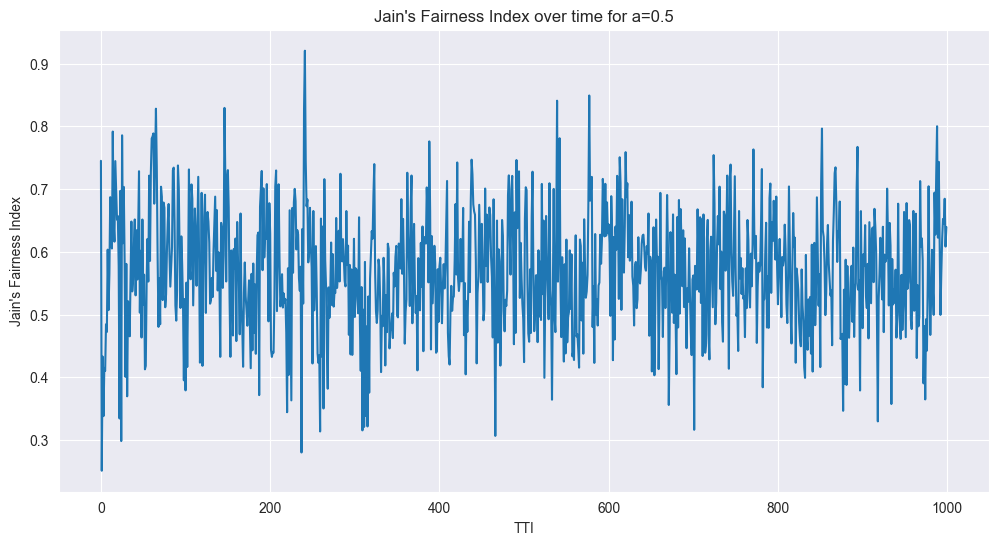

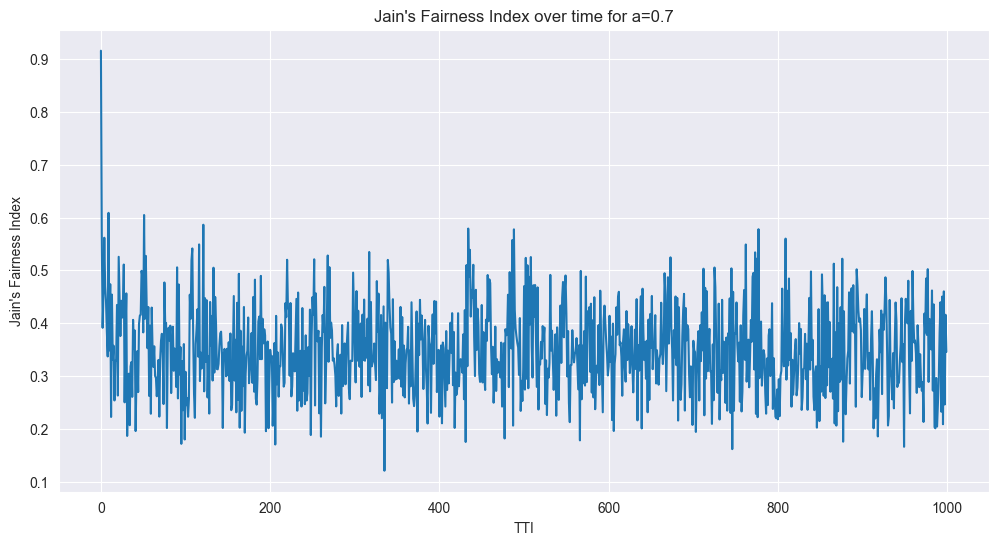

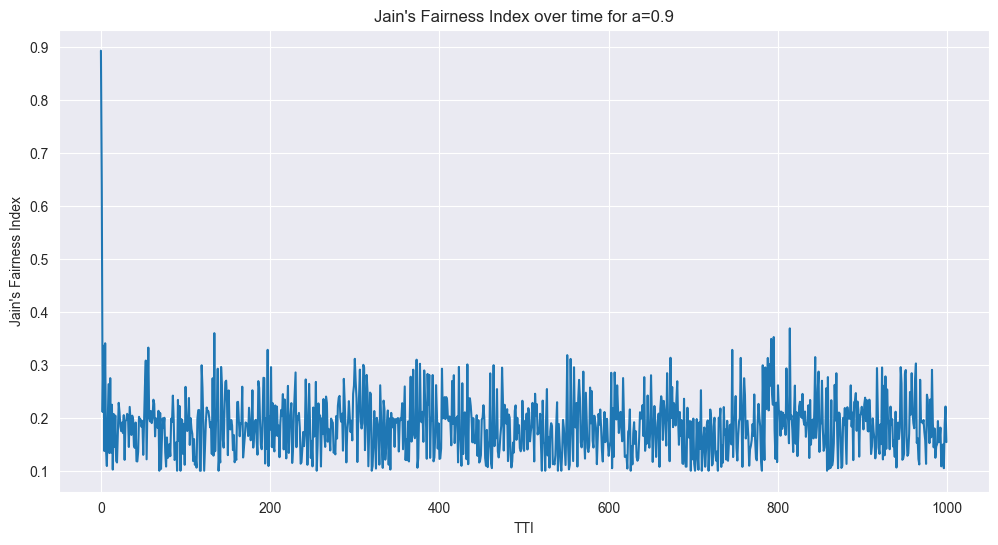

In [502]:
for a in a_values:
    jfi_history = jfi_history_a[a]

    plt.figure(figsize=(12, 6))
    plt.plot(range(T), jfi_history)
    plt.xlabel("TTI")
    plt.ylabel("Jain's Fairness Index")
    plt.title(f"Jain's Fairness Index over time for a={a}")
    plt.show()

Sum up of JFI for all a values


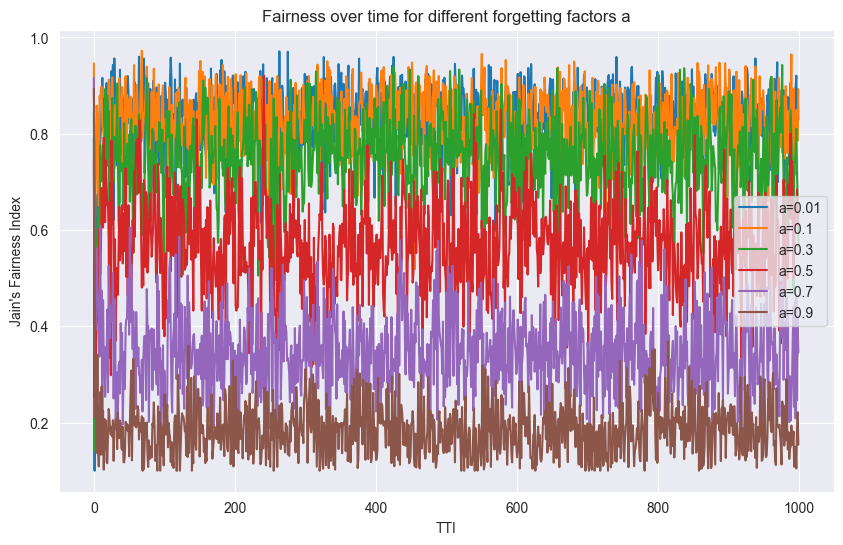

In [503]:
plt.figure(figsize=(10, 6))
for a in a_values:
    plt.plot(jfi_history_a[a], label=f"a={a}")
plt.xlabel("TTI")
plt.ylabel("Jain's Fairness Index")
plt.title("Fairness over time for different forgetting factors a")
plt.legend()
plt.show()


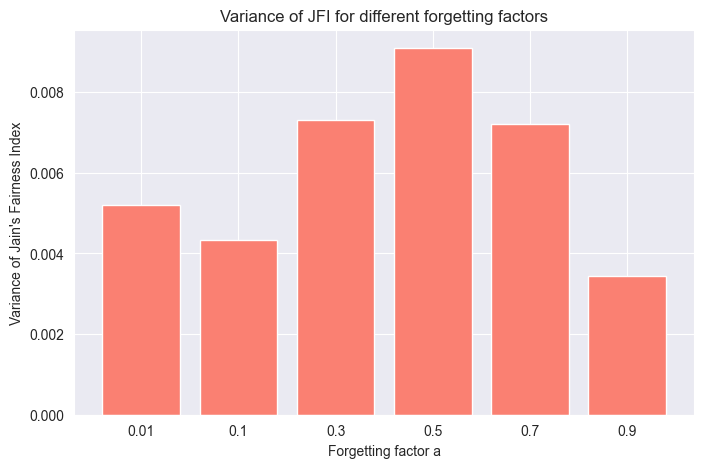

In [504]:
# Compute JFI variance for each a
jfi_variance = [np.var(jfi_history_a[a]) for a in a_values]

plt.figure(figsize=(8,5))
plt.bar([str(a) for a in a_values], jfi_variance, color='salmon')
plt.xlabel("Forgetting factor a")
plt.ylabel("Variance of Jain's Fairness Index")
plt.title("Variance of JFI for different forgetting factors")
plt.show()